this code is written based on https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz #plot tree

import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv("/Users/fatemeh/Downloads/heart.csv")

In [70]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

#sex: 0 = female and 1 = male
#fasting_blood_sugar:  0 = lower than 120mg/ml and 1 = lower than 120mg/ml 

In [71]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', 1), data['target'], test_size = 0.2) #split the data
# X_train


In [72]:
#fits a random forest model to the data

model = RandomForestClassifier(max_depth=4)
# model = RandomForestClassifier(n_estimators=10)
model_fit = model.fit(X_train, y_train)
model_fit

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
# With a random forest, every tree will be built differently.
# It’s helpful to limit maximum depth in your trees when you have a lot of features

estimator = model.estimators_[1] # Extract single tree
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

# y_train_str = y_train_str[7]

In [74]:
##install graphviz

# import getpass
# import os

# password = getpass.getpass()
# command = "sudo apt install python-pydot python-pydot-ng graphviz" #can be any command but don't forget -S as it enables input from stdin
# os.system('echo %s | %s' % ('passcode', command))

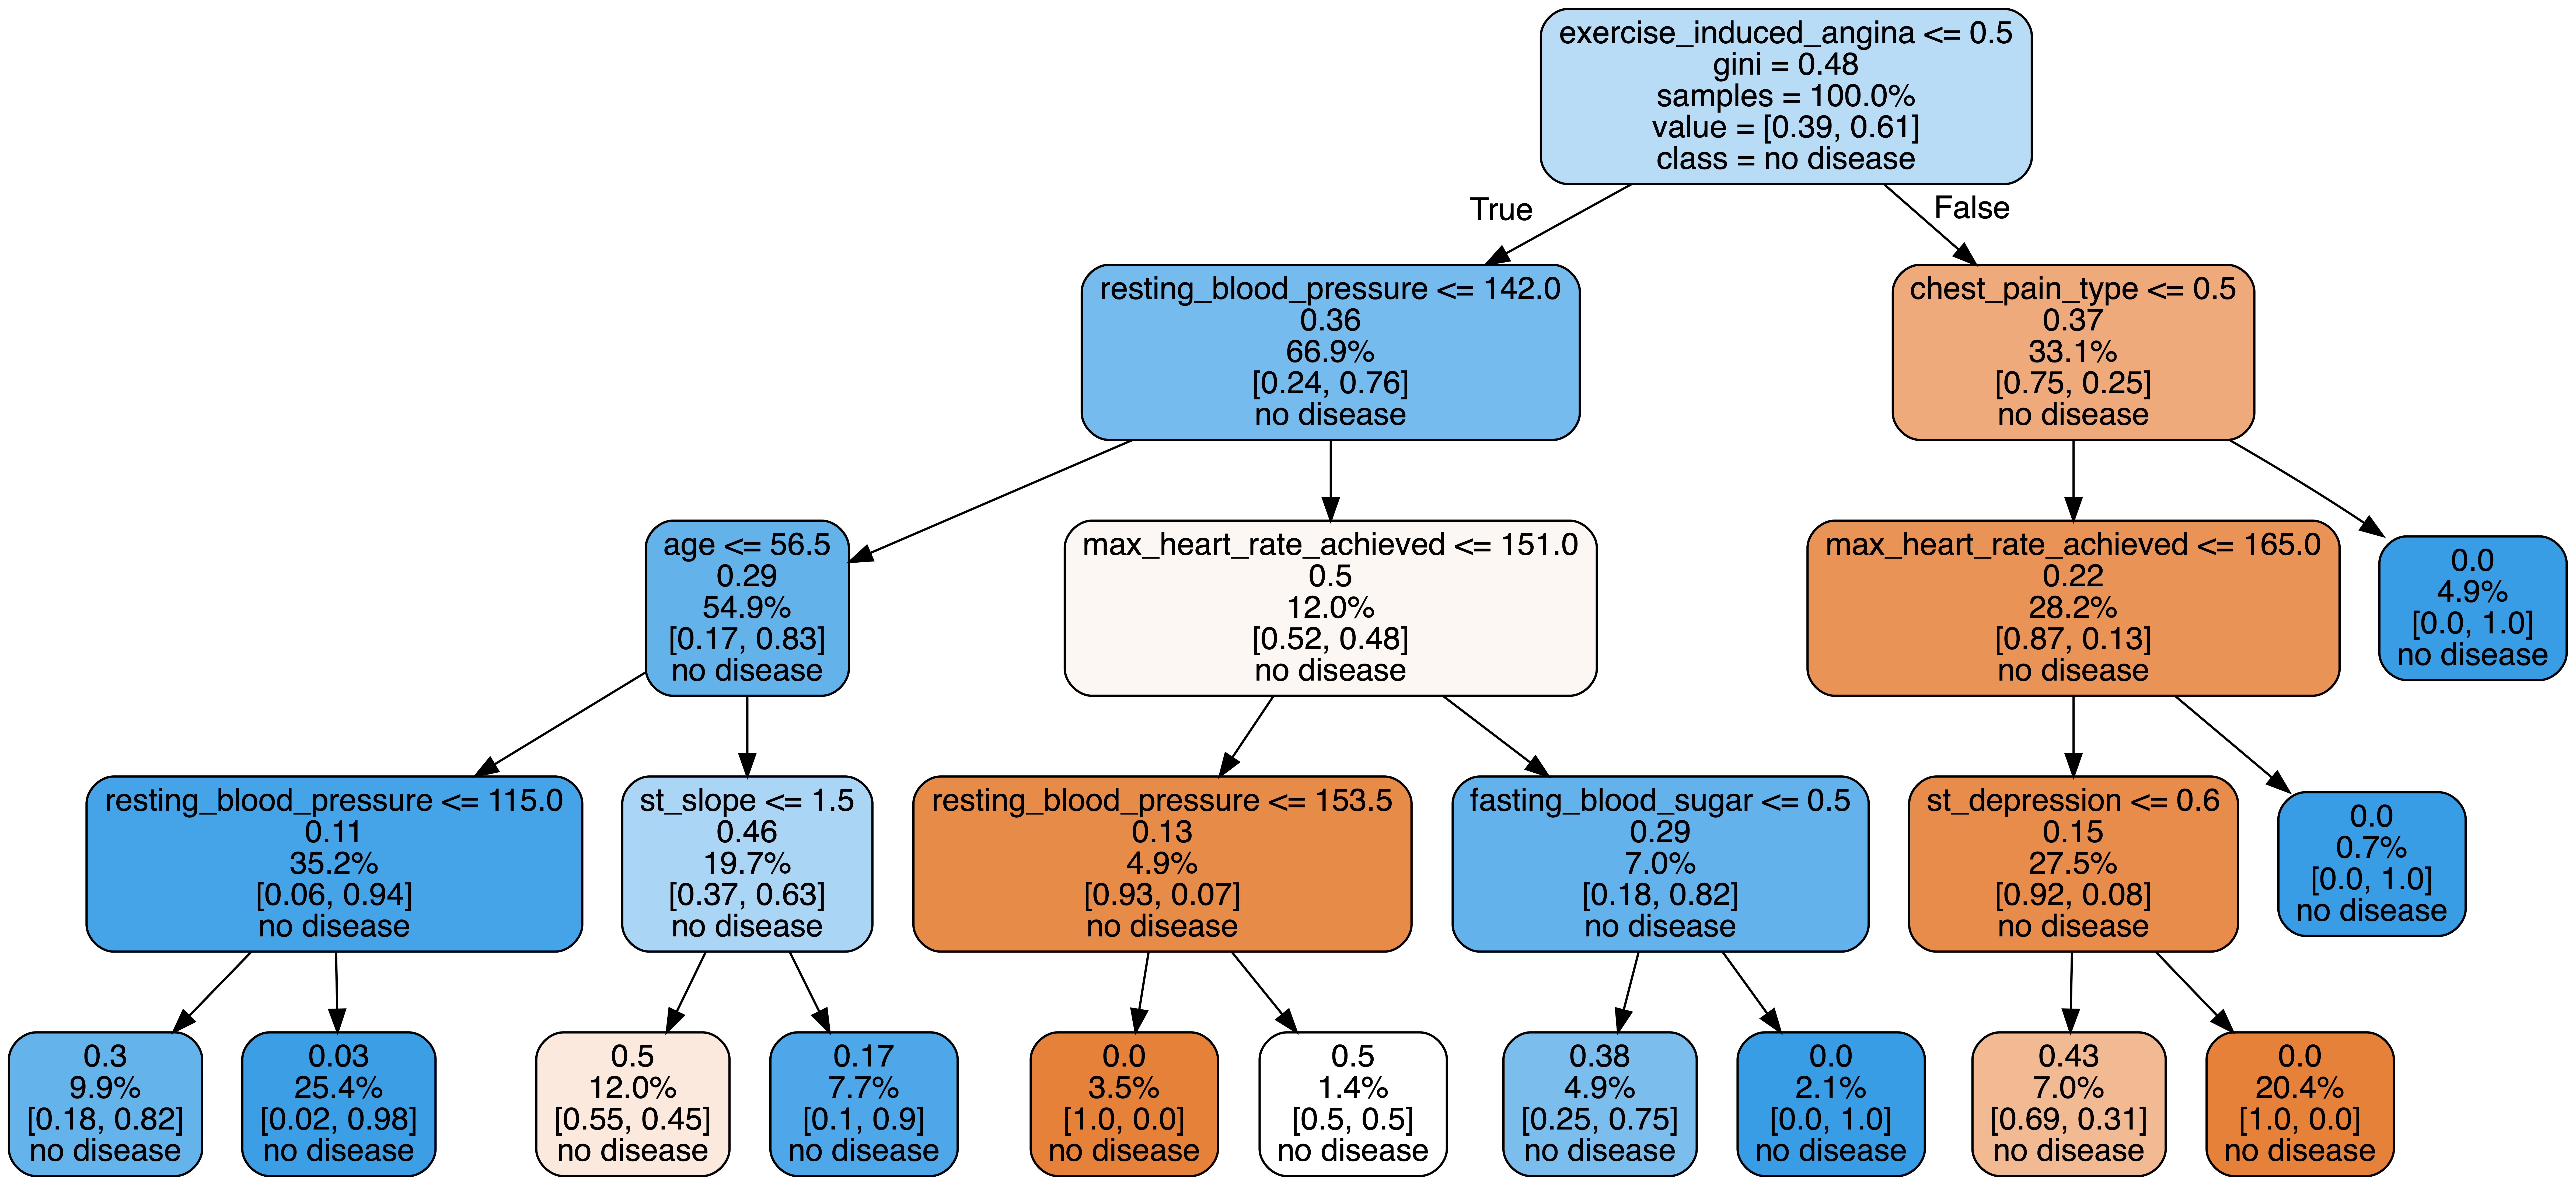

In [75]:
#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

# Evaluate Model

In [76]:
y_predict = model.predict(X_test) #it is an array that in each row shows the probability of classes

y_pred_one = model.predict_proba(X_test)[:, 1]
y_pred_zero = model.predict_proba(X_test)[:, 0]

In [77]:
y_pred_one

array([0.40003968, 0.21176136, 0.91030605, 0.57870806, 0.96090129,
       0.65024871, 0.26642457, 0.02636364, 0.11811828, 0.80311852,
       0.69651046, 0.33104602, 0.7503597 , 0.27750817, 0.68848449,
       0.70475566, 0.5171326 , 0.34366508, 0.02564353, 0.82770974,
       0.72150476, 0.80497953, 0.88447646, 0.88010764, 0.5652229 ,
       0.07478495, 0.49610262, 0.94709582, 0.80855952, 0.36112795,
       0.62488717, 0.96847705, 0.54974582, 0.70984379, 0.82252818,
       0.09121592, 0.07631693, 0.63066226, 0.75018909, 0.94943317,
       0.67524749, 0.66442001, 0.59478925, 0.90039564, 0.03712501,
       0.84793651, 0.49042365, 0.7568128 , 0.10478495, 0.92004329,
       0.80321263, 0.85988442, 0.3699745 , 0.18257956, 0.5193404 ,
       0.76840744, 0.8279422 , 0.73709551, 0.34506816, 0.80116881,
       0.33988304])

In [78]:
y_pred_zero

array([0.59996032, 0.78823864, 0.08969395, 0.42129194, 0.03909871,
       0.34975129, 0.73357543, 0.97363636, 0.88188172, 0.19688148,
       0.30348954, 0.66895398, 0.2496403 , 0.72249183, 0.31151551,
       0.29524434, 0.4828674 , 0.65633492, 0.97435647, 0.17229026,
       0.27849524, 0.19502047, 0.11552354, 0.11989236, 0.4347771 ,
       0.92521505, 0.50389738, 0.05290418, 0.19144048, 0.63887205,
       0.37511283, 0.03152295, 0.45025418, 0.29015621, 0.17747182,
       0.90878408, 0.92368307, 0.36933774, 0.24981091, 0.05056683,
       0.32475251, 0.33557999, 0.40521075, 0.09960436, 0.96287499,
       0.15206349, 0.50957635, 0.2431872 , 0.89521505, 0.07995671,
       0.19678737, 0.14011558, 0.6300255 , 0.81742044, 0.4806596 ,
       0.23159256, 0.1720578 , 0.26290449, 0.65493184, 0.19883119,
       0.66011696])

In [79]:
#Assess the fit with a confusion matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

array([[18,  9],
       [ 3, 31]])

In [80]:
#Calculate sensivity and specificity

total=sum(sum(confusion_matrix)) #sum of all the values in matrix

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity is: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity is: ', specificity)

Sensitivity is:  0.8571428571428571
Specificity is:  0.775


# EVALUTE_ROC_AUC

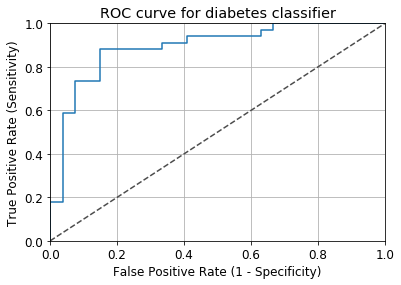

In [81]:
# Check Receiver Operator Curve (ROC)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_one)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [82]:
"""
AUC can be classed as follows,

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail

"""

metrics.auc(fpr, tpr)

0.8921568627450981

In [83]:
"""
Permutation Importance: is the first tool for understanding a ML model
It involves shuffling individual column in the validation data (after a model has been fit)

"""
from eli5.sklearn import PermutationImportance
import eli5

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
# eli5.show_weights(perm)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Weight,Feature
0.1115 ± 0.0814,chest_pain_type
0.0361 ± 0.0636,thalassemia
0.0361 ± 0.0321,num_major_vessels
0.0295 ± 0.0564,max_heart_rate_achieved
0.0164 ± 0.0207,age
0.0098 ± 0.0161,st_depression
0.0098 ± 0.0161,rest_ecg
0.0066 ± 0.0161,st_slope
0.0066 ± 0.0334,sex
0.0033 ± 0.0245,resting_blood_pressure


In [84]:
temp = PermutationImportance(model).fit(X_train, y_train)
eli5.show_weights(temp, feature_names = X_train.columns.tolist())


Weight,Feature
0.1025 ± 0.0364,chest_pain_type
0.0479 ± 0.0153,exercise_induced_angina
0.0388 ± 0.0066,max_heart_rate_achieved
0.0306 ± 0.0084,thalassemia
0.0281 ± 0.0096,st_depression
0.0273 ± 0.0124,sex
0.0231 ± 0.0112,cholesterol
0.0157 ± 0.0081,st_slope
0.0124 ± 0.0117,num_major_vessels
0.0074 ± 0.0062,age


# EVALUTE_Partial Dependence Plot

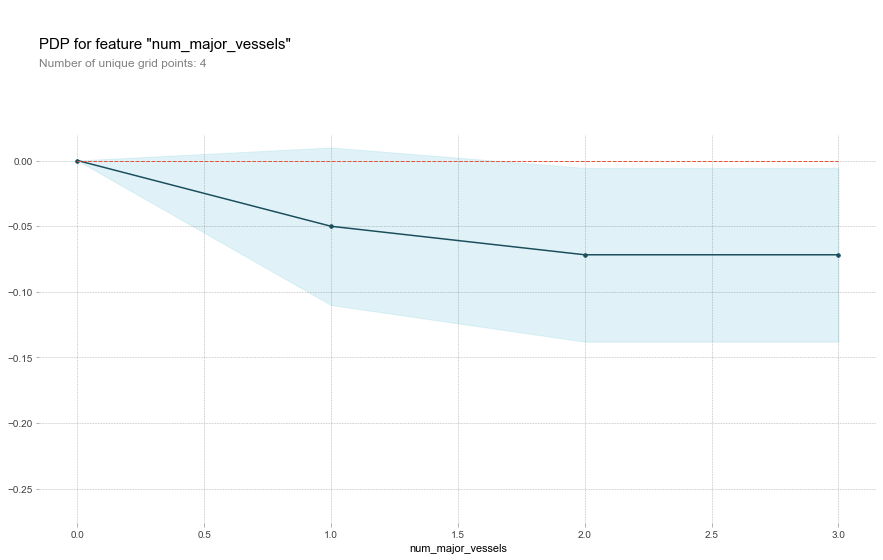

In [85]:
from pdpbox import pdp #for partial plots

AllFeatures = data.columns.values.tolist()
AllFeatures.remove('target')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=AllFeatures, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

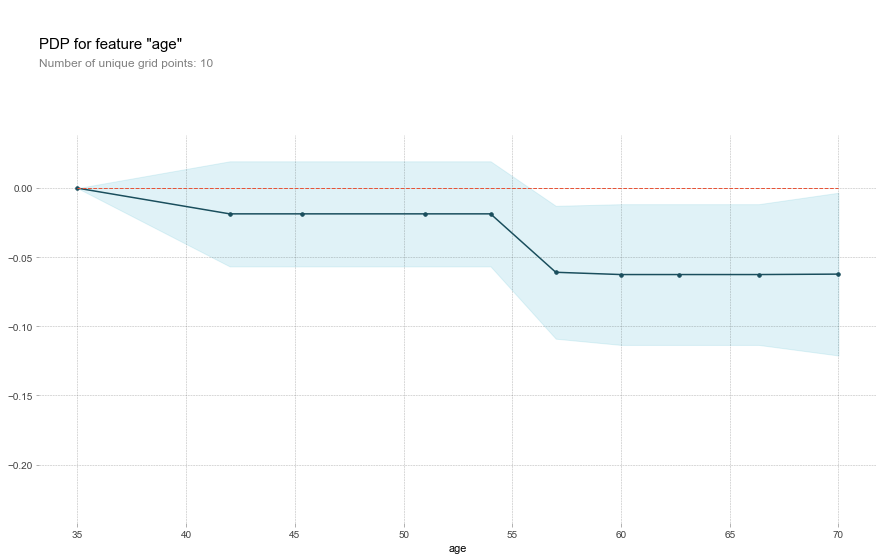

In [86]:
"""
That's a bit odd. The higher the age, the lower the chance of heart disease? 
Althought the blue confidence regions show that this might not be true (the red baseline is within the blue zone).

"""
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=AllFeatures, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

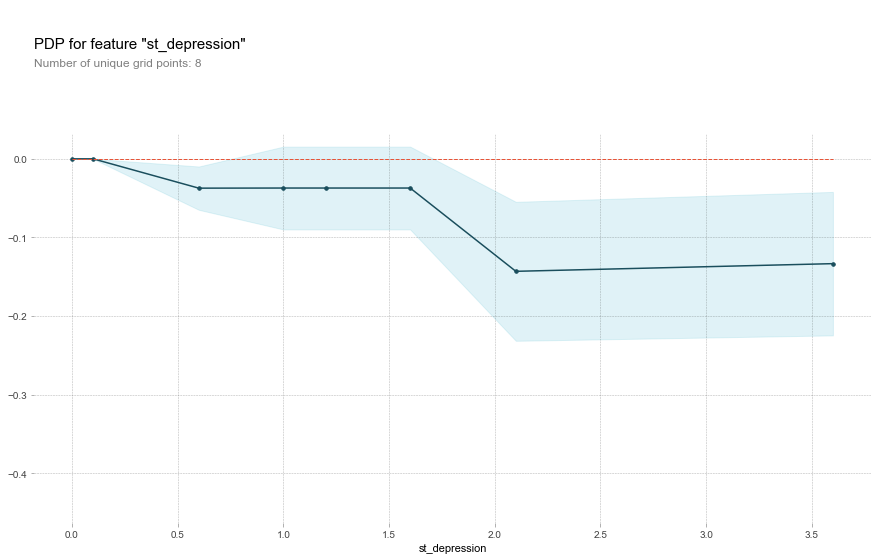

In [87]:

feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=AllFeatures, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

In [88]:
"""
So, this variable, which is described as 'ST depression induced by exercise relative to rest',
seems to suggest the higher the value the higher the probability of heart disease,
but the plot above shows the opposite.
"""

"\nSo, this variable, which is described as 'ST depression induced by exercise relative to rest',\nseems to suggest the higher the value the higher the probability of heart disease,\nbut the plot above shows the opposite.\n"

In [89]:
# import matplotlib
# print(matplotlib.__version__)

# SHAP Values

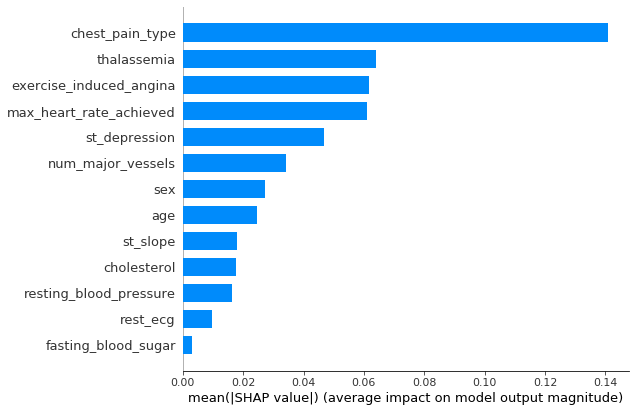

In [90]:
"""
Always We get the SHAP values for validation(test) data 

"""
import shap

explainer = shap.TreeExplainer(model)

# calculate shap values(type: list). This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make bar plot. Index of [1] is explained in text below.
"""
When plotting, we call shap_values[1]. 
For classification problems, there is a separate array of SHAP values for each possible outcome.
In this case, we index in to get the SHAP values for the prediction of "True".
"""
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

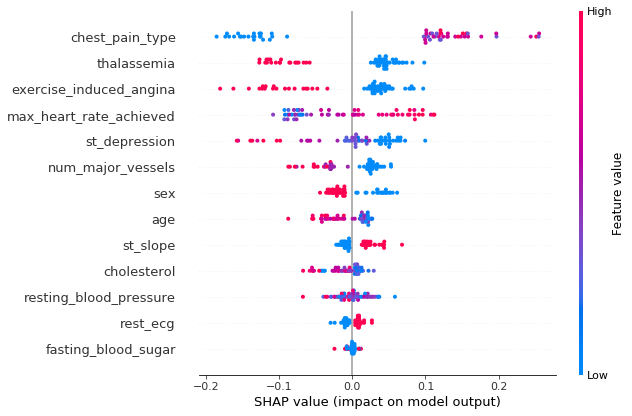

In [91]:
"""
If you subtract the length of the blue bars from the length of the pink bars,
it equals the distance from the base value to the output.

"""

shap.summary_plot(shap_values[1], X_test)

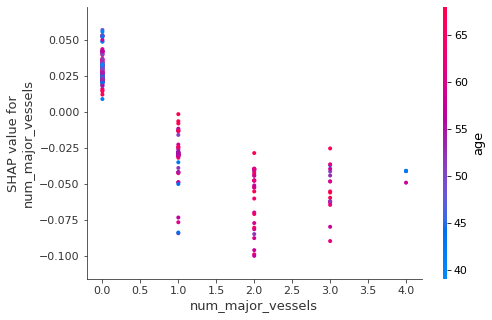

In [92]:
#check dipendency between two features

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_train)

# make plot.
shap.dependence_plot('num_major_vessels', shap_values[1], X_train, interaction_index="age")

In [93]:
"""
argument: a trained model, and a row of patient's features
return: a plot with prediction value and shows its difference with base value for that specific patient
and it enable us to see how the different variables are affecting prediction for this patient 

"""
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [94]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

according to this: https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

In [95]:
"""
This plot shows the predictions and influencing factors for many patients, all together. 
It's also interactive.
Hover over to see why each person ended up either red (prediction of disease) or blue (prediction of no disease),
"""

shap_values = explainer.shap_values(X_train.iloc[:50]) #consider only 50 patients
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])